In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\titanic.csv").dropna()

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,455.366120,247.052476,2.00,263.5,457.0,676.0,890.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

2      1
572    1
578    1
582    1
584    1
      ..
328    1
330    1
332    1
333    1
890    1
Name: PassengerId, Length: 183, dtype: int64
********************
1    123
0     60
Name: Survived, dtype: int64
********************
1    158
2     15
3     10
Name: Pclass, dtype: int64
********************
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)           1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Ross, Mr. John Hugo                                     1
                                                       ..
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Graham, Mr. George Edward                               1
Behr, Mr. Karl Howell                                   1
Name: Name, Length: 183, dtype: int64
****************

In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
3,1,1,female,35.0,1,0,S
6,0,1,male,54.0,0,0,S
10,1,3,female,4.0,1,1,S
11,1,1,female,58.0,0,0,S


###### Feature Engineering

In [12]:
e = df[[col for col in df.columns if col in ['Sex','Embarked']]]

In [13]:
e

,Sex,Embarked
1,female,C
3,female,S
6,male,S
10,female,S
11,female,S
...,...,...
871,female,S
872,male,S
879,female,C
887,female,S


In [14]:
e['Sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
e['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [16]:
ob = OrdinalEncoder(categories=[['male', 'female'],['S', 'C', 'Q']])

In [17]:
ob.fit(e)

OrdinalEncoder(categories=[['male', 'female'], ['S', 'C', 'Q']])

In [18]:
ob.transform(e)

array([[1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 2.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.

In [19]:
ee = pd.DataFrame(ob.transform(e),columns=['en_Gen','en_Embarked'])

In [20]:
ee.sample(5)

,en_Gen,en_Embarked
29,1.0,1.0
141,0.0,1.0
7,0.0,0.0
11,1.0,0.0
181,1.0,0.0


In [21]:
Chi_Sq,P_Val = chi2(ee,df['Survived'])

In [22]:
print(Chi_Sq)
P_Val = np.around(P_Val,5)
print(P_Val)

[26.92954545  0.86322022]
[0.      0.35284]


In [23]:
dfSq = pd.DataFrame({'features':e.columns,'Chi':Chi_Sq,'P_val':P_Val})

In [24]:
dfSq

,features,Chi,P_val
0,Sex,26.929545,0.00000
1,Embarked,0.863220,0.35284


C:\Users\tsd95\AppData\Local\Temp\ipykernel_7260\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

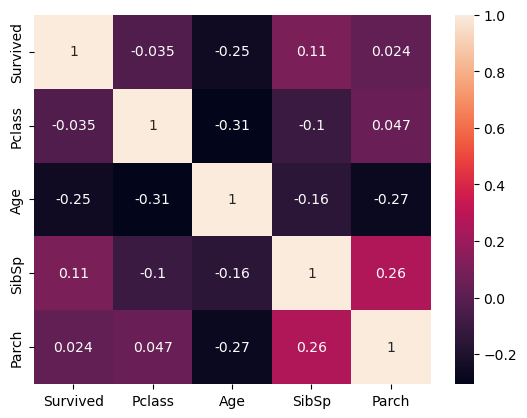

In [25]:
sns.heatmap(df.corr(),annot=True)

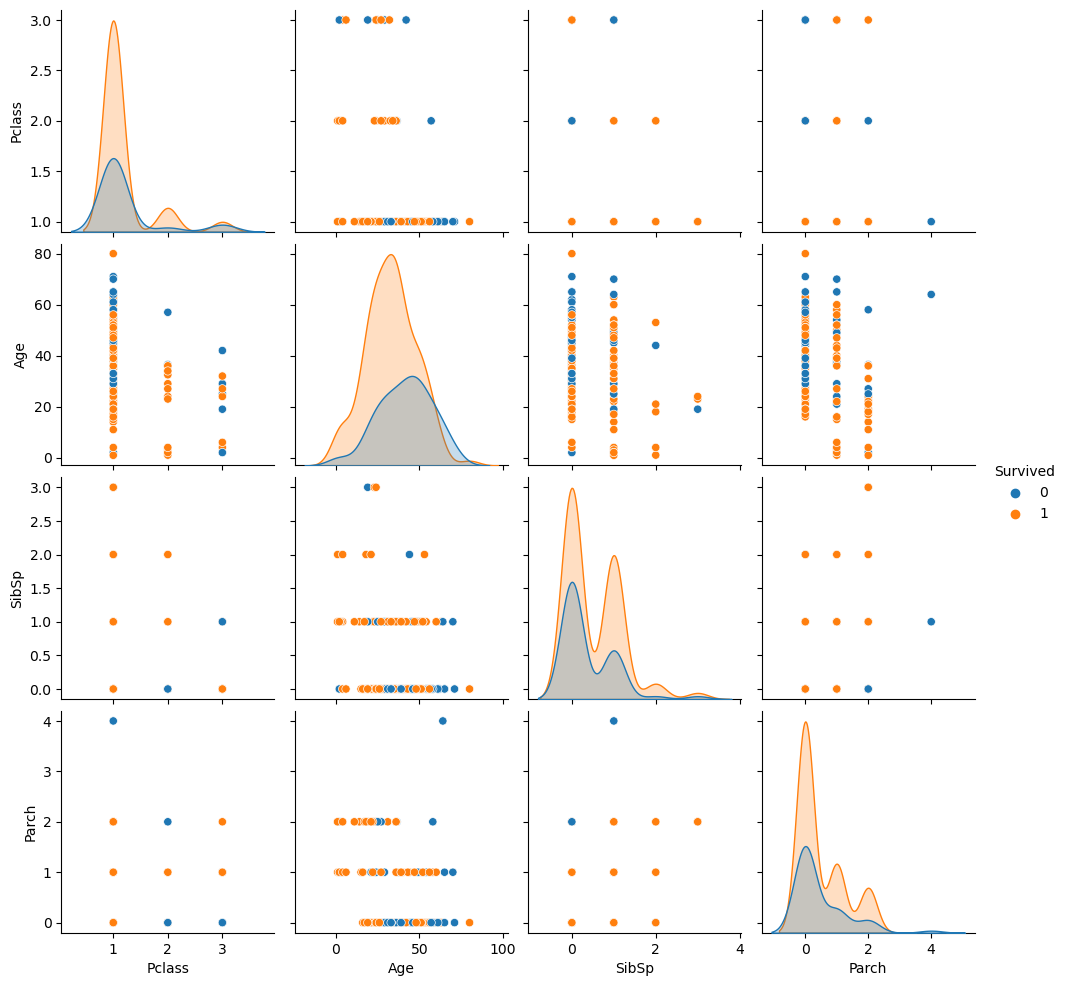

In [26]:
sns.pairplot(data=df,hue='Survived')

In [27]:
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
1,1,1,female,38.0,1,0,C,1,0
3,1,1,female,35.0,1,0,S,1,0
6,0,1,male,54.0,0,0,S,0,1
10,1,3,female,4.0,1,1,S,1,0
11,1,1,female,58.0,0,0,S,1,0


In [29]:
df.drop(['Pclass','Sex','Age','SibSp','Parch','Embarked'],axis=1,inplace=True)

In [30]:
df

,Survived,female,male
1,1,1,0
3,1,1,0
6,0,0,1
10,1,1,0
11,1,1,0
...,...,...,...
871,1,1,0
872,0,0,1
879,1,1,0
887,1,1,0


In [31]:
X = df.drop('Survived',axis=1)

In [32]:
X

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [33]:
y =df['Survived']

In [34]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [36]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (128, 2)
Size_of X_test (55, 2)
Size_of y_train (128,)
Size_of y_test (55,)


In [37]:
le = LogisticRegression()

In [38]:
model = le.fit(X_train,y_train)

In [39]:
yPred = model.predict(X_test)

In [40]:
yPred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [41]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        18
           1       1.00      0.65      0.79        37

    accuracy                           0.76        55
   macro avg       0.79      0.82      0.76        55
weighted avg       0.86      0.76      0.77        55



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
cls_entropy = DecisionTreeClassifier(criterion='entropy')

In [44]:
cls_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
cls_entropy.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [46]:
print(classification_report(y_test,cls_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        18
           1       1.00      0.65      0.79        37

    accuracy                           0.76        55
   macro avg       0.79      0.82      0.76        55
weighted avg       0.86      0.76      0.77        55

